# Polynomial Regression

## Import Packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

## Data

In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


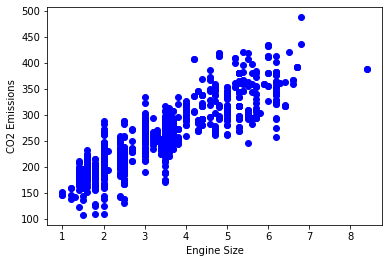

In [4]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.show()

### Creating train and test dataset

In [5]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Model

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

In [7]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

print(clf.coef_)
print(clf.intercept_)

[[ 0.         51.36144957 -1.6687147 ]]
[106.05280209]


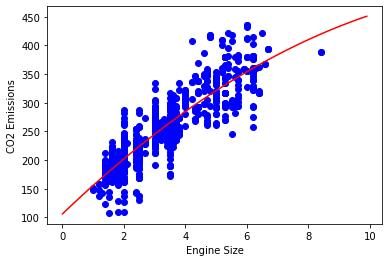

In [9]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.show()

## Evaluation

In [12]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("MAE: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares: %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-Score: %.2f" % r2_score(test_y, test_y_))

MAE: 21.80
Residual sum of squares: 793.55
R2-Score: 0.80


## Practice

In [16]:
poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.   ,  2.   ,  4.   ,  8.   ],
       [ 1.   ,  2.4  ,  5.76 , 13.824],
       [ 1.   ,  1.5  ,  2.25 ,  3.375],
       ...,
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

In [17]:
regr = linear_model.LinearRegression()
regr.fit(train_x_poly, train_y)

regr.coef_

array([[ 0.        , 21.39787906,  6.56037845, -0.68008931]])

In [22]:
test_x_poly = poly.fit_transform(test_x)
test_y_ = regr.predict(test_x_poly)

r2_score(test_y, test_y_)

0.792418473171334